In [ ]:
# Test 3-4 Dataset C
# This test uses a simple CNN to classify between having an Square or a Circle

In [8]:
import numpy as np
import optuna as opt
from optuna.visualization import plot_optimization_history
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import image_dataset_from_directory
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
train_dir = '../../Generator/Datasets/Dataset_C2/train'
test_dir = '../../Generator/Datasets/Dataset_C2/test'

In [10]:
IMG_SIZE = 250
BATCH_SIZE = 32

In [11]:
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [14]:
checkpoint_filepath = 'models/3-4_optuna/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

In [15]:
def objective(trial):
    opt_num_hidden_dense_units = trial.suggest_int("opt_num_hidden_dense_units", 10, 512)
    opt_lr = trial.suggest_float("opt_lr", 1e-6, 1e-2, log=True)
    opt_bs = trial.suggest_int("opt_bs", 16, 128)
    inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(filters=4, kernel_size=5, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=8, kernel_size=5, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=8, kernel_size=5, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=16, kernel_size=5, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(opt_num_hidden_dense_units, activation="relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.RMSprop(opt_lr), metrics=['acc'])
    history = model.fit(train_dataset, epochs=10, batch_size=opt_bs, validation_data=test_dataset, callbacks=[callbacks])
    min_val_loss = np.amin(history.history["val_loss"])
    return min_val_loss

In [16]:
study = opt.create_study()
study.optimize(objective, n_trials=10)

[I 2024-04-03 02:12:14,652] A new study created in memory with name: no-name-3665ee3b-55a4-4987-bd31-d174dfbe57ea


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.4977
Epoch 1: val_loss improved from inf to 0.69311, saving model to models/3-4_optuna/ch-001.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-001.ckpt/assets


94/94 [==============================] - 10s 69ms/step - loss: 0.6935 - acc: 0.4977 - val_loss: 0.6931 - val_acc: 0.5070
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6931 - acc: 0.4797
Epoch 2: val_loss improved from 0.69311 to 0.69295, saving model to models/3-4_optuna/ch-002.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-002.ckpt/assets


94/94 [==============================] - 6s 56ms/step - loss: 0.6931 - acc: 0.4797 - val_loss: 0.6929 - val_acc: 0.5120
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6926 - acc: 0.5077
Epoch 3: val_loss improved from 0.69295 to 0.69278, saving model to models/3-4_optuna/ch-003.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-003.ckpt/assets


94/94 [==============================] - 5s 53ms/step - loss: 0.6925 - acc: 0.5073 - val_loss: 0.6928 - val_acc: 0.5040
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6922 - acc: 0.5024
Epoch 4: val_loss improved from 0.69278 to 0.69260, saving model to models/3-4_optuna/ch-004.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-004.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.6921 - acc: 0.5037 - val_loss: 0.6926 - val_acc: 0.4950
Epoch 5/10
93/94 [============================>.] - ETA: 0s - loss: 0.6925 - acc: 0.5007
Epoch 5: val_loss improved from 0.69260 to 0.69244, saving model to models/3-4_optuna/ch-005.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-005.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.6925 - acc: 0.5007 - val_loss: 0.6924 - val_acc: 0.4970
Epoch 6/10
94/94 [==============================] - ETA: 0s - loss: 0.6923 - acc: 0.5200
Epoch 6: val_loss improved from 0.69244 to 0.69234, saving model to models/3-4_optuna/ch-006.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-006.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.6923 - acc: 0.5200 - val_loss: 0.6923 - val_acc: 0.4990
Epoch 7/10
93/94 [============================>.] - ETA: 0s - loss: 0.6919 - acc: 0.5128
Epoch 7: val_loss improved from 0.69234 to 0.69217, saving model to models/3-4_optuna/ch-007.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-007.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.6918 - acc: 0.5130 - val_loss: 0.6922 - val_acc: 0.5000
Epoch 8/10
94/94 [==============================] - ETA: 0s - loss: 0.6919 - acc: 0.5030
Epoch 8: val_loss improved from 0.69217 to 0.69195, saving model to models/3-4_optuna/ch-008.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-008.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.6919 - acc: 0.5030 - val_loss: 0.6919 - val_acc: 0.5000
Epoch 9/10
93/94 [============================>.] - ETA: 0s - loss: 0.6920 - acc: 0.5027
Epoch 9: val_loss improved from 0.69195 to 0.69177, saving model to models/3-4_optuna/ch-009.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-009.ckpt/assets


94/94 [==============================] - 6s 58ms/step - loss: 0.6919 - acc: 0.5037 - val_loss: 0.6918 - val_acc: 0.5030
Epoch 10/10
93/94 [============================>.] - ETA: 0s - loss: 0.6918 - acc: 0.5121
Epoch 10: val_loss improved from 0.69177 to 0.69165, saving model to models/3-4_optuna/ch-010.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-010.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.6918 - acc: 0.5117 - val_loss: 0.6916 - val_acc: 0.5000


[I 2024-04-03 02:13:12,921] Trial 0 finished with value: 0.6916497349739075 and parameters: {'opt_num_hidden_dense_units': 124, 'opt_lr': 1.5084285565888708e-05, 'opt_bs': 26}. Best is trial 0 with value: 0.6916497349739075.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6934 - acc: 0.4815
Epoch 1: val_loss did not improve from 0.69165
94/94 [==============================] - 6s 45ms/step - loss: 0.6934 - acc: 0.4813 - val_loss: 0.6928 - val_acc: 0.5010
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6930 - acc: 0.5128
Epoch 2: val_loss did not improve from 0.69165
94/94 [==============================] - 5s 47ms/step - loss: 0.6930 - acc: 0.5127 - val_loss: 0.6928 - val_acc: 0.5090
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6930 - acc: 0.4923
Epoch 3: val_loss did not improve from 0.69165
94/94 [==============================] - 4s 44ms/step - loss: 0.6930 - acc: 0.4920 - val_loss: 0.6925 - val_acc: 0.5190
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6921 - acc: 0.5163
Epoch 4: val_loss did not improve from 0.69165
94/94 [==============================] - 4s 44ms/step - loss: 0.6921 - acc: 0.5163 - val_loss: 0

INFO:tensorflow:Assets written to: models/3-4_optuna/ch-006.ckpt/assets


94/94 [==============================] - 6s 56ms/step - loss: 0.6908 - acc: 0.5233 - val_loss: 0.6916 - val_acc: 0.5210
Epoch 7/10
93/94 [============================>.] - ETA: 0s - loss: 0.6905 - acc: 0.5202
Epoch 7: val_loss improved from 0.69160 to 0.69148, saving model to models/3-4_optuna/ch-007.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-007.ckpt/assets


94/94 [==============================] - 5s 49ms/step - loss: 0.6906 - acc: 0.5200 - val_loss: 0.6915 - val_acc: 0.5430
Epoch 8/10
93/94 [============================>.] - ETA: 0s - loss: 0.6902 - acc: 0.5212
Epoch 8: val_loss improved from 0.69148 to 0.69123, saving model to models/3-4_optuna/ch-008.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-008.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.6902 - acc: 0.5220 - val_loss: 0.6912 - val_acc: 0.5470
Epoch 9/10
92/94 [============================>.] - ETA: 0s - loss: 0.6891 - acc: 0.5408
Epoch 9: val_loss improved from 0.69123 to 0.69095, saving model to models/3-4_optuna/ch-009.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-009.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.6890 - acc: 0.5413 - val_loss: 0.6910 - val_acc: 0.5370
Epoch 10/10
93/94 [============================>.] - ETA: 0s - loss: 0.6877 - acc: 0.5309
Epoch 10: val_loss improved from 0.69095 to 0.69090, saving model to models/3-4_optuna/ch-010.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-010.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.6877 - acc: 0.5320 - val_loss: 0.6909 - val_acc: 0.5450


[I 2024-04-03 02:14:03,482] Trial 1 finished with value: 0.6908963918685913 and parameters: {'opt_num_hidden_dense_units': 18, 'opt_lr': 7.332780706696832e-05, 'opt_bs': 87}. Best is trial 1 with value: 0.6908963918685913.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6935 - acc: 0.4976
Epoch 1: val_loss did not improve from 0.69090
94/94 [==============================] - 5s 43ms/step - loss: 0.6935 - acc: 0.4980 - val_loss: 0.6930 - val_acc: 0.5110
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6926 - acc: 0.5173
Epoch 2: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 44ms/step - loss: 0.6926 - acc: 0.5173 - val_loss: 0.6930 - val_acc: 0.5050
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.6925 - acc: 0.5137
Epoch 3: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 44ms/step - loss: 0.6925 - acc: 0.5137 - val_loss: 0.6930 - val_acc: 0.4930
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6933 - acc: 0.4859
Epoch 4: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 43ms/step - loss: 0.6933 - acc: 0.4867 - val_loss: 0

[I 2024-04-03 02:14:48,913] Trial 2 finished with value: 0.69298255443573 and parameters: {'opt_num_hidden_dense_units': 131, 'opt_lr': 1.5145027221310157e-06, 'opt_bs': 73}. Best is trial 1 with value: 0.6908963918685913.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 1.6749 - acc: 0.4993
Epoch 1: val_loss did not improve from 0.69090
94/94 [==============================] - 6s 48ms/step - loss: 1.6749 - acc: 0.4993 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6936 - acc: 0.4892
Epoch 2: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 42ms/step - loss: 0.6936 - acc: 0.4913 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6935 - acc: 0.4956
Epoch 3: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 41ms/step - loss: 0.6935 - acc: 0.4963 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6937 - acc: 0.4950
Epoch 4: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 42ms/step - loss: 0.6937 - acc: 0.4950 - val_loss: 0

[I 2024-04-03 02:15:33,589] Trial 3 finished with value: 0.6931701898574829 and parameters: {'opt_num_hidden_dense_units': 40, 'opt_lr': 0.007632916499516756, 'opt_bs': 116}. Best is trial 1 with value: 0.6908963918685913.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6939 - acc: 0.4947
Epoch 1: val_loss did not improve from 0.69090
94/94 [==============================] - 6s 47ms/step - loss: 0.6939 - acc: 0.4947 - val_loss: 0.7024 - val_acc: 0.5000
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6939 - acc: 0.5050
Epoch 2: val_loss did not improve from 0.69090
94/94 [==============================] - 5s 47ms/step - loss: 0.6939 - acc: 0.5047 - val_loss: 0.6928 - val_acc: 0.4970
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.5067
Epoch 3: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 44ms/step - loss: 0.6935 - acc: 0.5067 - val_loss: 0.6929 - val_acc: 0.5250
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6922 - acc: 0.5245
Epoch 4: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 43ms/step - loss: 0.6922 - acc: 0.5257 - val_loss: 0

[I 2024-04-03 02:16:19,763] Trial 4 finished with value: 0.692771315574646 and parameters: {'opt_num_hidden_dense_units': 18, 'opt_lr': 0.0006352786333452022, 'opt_bs': 99}. Best is trial 1 with value: 0.6908963918685913.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.7074 - acc: 0.4892
Epoch 1: val_loss did not improve from 0.69090
94/94 [==============================] - 6s 46ms/step - loss: 0.7073 - acc: 0.4893 - val_loss: 0.6959 - val_acc: 0.4760
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.7018 - acc: 0.4872
Epoch 2: val_loss did not improve from 0.69090
94/94 [==============================] - 5s 46ms/step - loss: 0.7014 - acc: 0.4893 - val_loss: 0.6954 - val_acc: 0.4770
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.7001 - acc: 0.4936
Epoch 3: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 42ms/step - loss: 0.6999 - acc: 0.4940 - val_loss: 0.6951 - val_acc: 0.4780
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6998 - acc: 0.4946
Epoch 4: val_loss did not improve from 0.69090
94/94 [==============================] - 5s 47ms/step - loss: 0.6998 - acc: 0.4937 - val_loss: 0

[I 2024-04-03 02:17:04,167] Trial 5 finished with value: 0.6939082741737366 and parameters: {'opt_num_hidden_dense_units': 233, 'opt_lr': 9.983146167680267e-06, 'opt_bs': 19}. Best is trial 1 with value: 0.6908963918685913.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6975 - acc: 0.5067
Epoch 1: val_loss did not improve from 0.69090
94/94 [==============================] - 5s 41ms/step - loss: 0.6975 - acc: 0.5067 - val_loss: 0.6932 - val_acc: 0.5040
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6946 - acc: 0.5054
Epoch 2: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 41ms/step - loss: 0.6946 - acc: 0.5063 - val_loss: 0.6935 - val_acc: 0.4930
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6949 - acc: 0.5047
Epoch 3: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 41ms/step - loss: 0.6949 - acc: 0.5057 - val_loss: 0.6939 - val_acc: 0.4860
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6962 - acc: 0.5090
Epoch 4: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 39ms/step - loss: 0.6962 - acc: 0.5090 - val_loss: 0

[I 2024-04-03 02:17:45,542] Trial 6 finished with value: 0.6932004690170288 and parameters: {'opt_num_hidden_dense_units': 396, 'opt_lr': 2.0395379930276825e-06, 'opt_bs': 37}. Best is trial 1 with value: 0.6908963918685913.


Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 0.6997 - acc: 0.4963
Epoch 1: val_loss did not improve from 0.69090
94/94 [==============================] - 6s 46ms/step - loss: 0.6997 - acc: 0.4963 - val_loss: 0.6930 - val_acc: 0.5020
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6934 - acc: 0.5060
Epoch 2: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 42ms/step - loss: 0.6934 - acc: 0.5060 - val_loss: 0.6944 - val_acc: 0.4950
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6940 - acc: 0.5326
Epoch 3: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 44ms/step - loss: 0.6941 - acc: 0.5320 - val_loss: 0.6959 - val_acc: 0.5160
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6912 - acc: 0.5280
Epoch 4: val_loss did not improve from 0.69090
94/94 [==============================] - 4s 43ms/step - loss: 0.6912 - acc: 0.5280 - val_loss: 0

INFO:tensorflow:Assets written to: models/3-4_optuna/ch-005.ckpt/assets


94/94 [==============================] - 7s 71ms/step - loss: 0.6820 - acc: 0.5593 - val_loss: 0.6902 - val_acc: 0.5250
Epoch 6/10
94/94 [==============================] - ETA: 0s - loss: 0.6653 - acc: 0.6017
Epoch 6: val_loss improved from 0.69017 to 0.66296, saving model to models/3-4_optuna/ch-006.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-006.ckpt/assets


94/94 [==============================] - 6s 58ms/step - loss: 0.6653 - acc: 0.6017 - val_loss: 0.6630 - val_acc: 0.6240
Epoch 7/10
94/94 [==============================] - ETA: 0s - loss: 0.5856 - acc: 0.7170
Epoch 7: val_loss improved from 0.66296 to 0.49535, saving model to models/3-4_optuna/ch-007.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-007.ckpt/assets


94/94 [==============================] - 6s 60ms/step - loss: 0.5856 - acc: 0.7170 - val_loss: 0.4954 - val_acc: 0.8160
Epoch 8/10
93/94 [============================>.] - ETA: 0s - loss: 0.3808 - acc: 0.8458
Epoch 8: val_loss did not improve from 0.49535
94/94 [==============================] - 5s 46ms/step - loss: 0.3893 - acc: 0.8430 - val_loss: 0.5338 - val_acc: 0.7430
Epoch 9/10
93/94 [============================>.] - ETA: 0s - loss: 0.2264 - acc: 0.9157
Epoch 9: val_loss improved from 0.49535 to 0.22239, saving model to models/3-4_optuna/ch-009.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-009.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.2255 - acc: 0.9160 - val_loss: 0.2224 - val_acc: 0.9330
Epoch 10/10
93/94 [============================>.] - ETA: 0s - loss: 0.1737 - acc: 0.9375
Epoch 10: val_loss improved from 0.22239 to 0.19723, saving model to models/3-4_optuna/ch-010.ckpt
INFO:tensorflow:Assets written to: models/3-4_optuna/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4_optuna/ch-010.ckpt/assets


94/94 [==============================] - 6s 63ms/step - loss: 0.1732 - acc: 0.9373 - val_loss: 0.1972 - val_acc: 0.9300


[I 2024-04-03 02:18:38,894] Trial 7 finished with value: 0.1972348988056183 and parameters: {'opt_num_hidden_dense_units': 504, 'opt_lr': 0.001779648066993526, 'opt_bs': 78}. Best is trial 7 with value: 0.1972348988056183.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6994 - acc: 0.4960
Epoch 1: val_loss did not improve from 0.19723
94/94 [==============================] - 7s 53ms/step - loss: 0.6994 - acc: 0.4953 - val_loss: 0.6937 - val_acc: 0.4940
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 0.6947 - acc: 0.5007
Epoch 2: val_loss did not improve from 0.19723
94/94 [==============================] - 5s 49ms/step - loss: 0.6947 - acc: 0.5007 - val_loss: 0.6930 - val_acc: 0.5060
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6931 - acc: 0.4980
Epoch 3: val_loss did not improve from 0.19723
94/94 [==============================] - 4s 42ms/step - loss: 0.6931 - acc: 0.4987 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 4/10
93/94 [============================>.] - ETA: 0s - loss: 0.6942 - acc: 0.5185
Epoch 4: val_loss did not improve from 0.19723
94/94 [==============================] - 4s 44ms/step - loss: 0.6943 - acc: 0.5183 - val_loss: 0

[I 2024-04-03 02:19:27,789] Trial 8 finished with value: 0.6787333488464355 and parameters: {'opt_num_hidden_dense_units': 157, 'opt_lr': 0.0012768805291675715, 'opt_bs': 125}. Best is trial 7 with value: 0.1972348988056183.


Epoch 1/10
93/94 [============================>.] - ETA: 0s - loss: 0.6961 - acc: 0.4987
Epoch 1: val_loss did not improve from 0.19723
94/94 [==============================] - 6s 46ms/step - loss: 0.6961 - acc: 0.4983 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 2/10
93/94 [============================>.] - ETA: 0s - loss: 0.6954 - acc: 0.4976
Epoch 2: val_loss did not improve from 0.19723
94/94 [==============================] - 4s 43ms/step - loss: 0.6954 - acc: 0.4973 - val_loss: 0.6944 - val_acc: 0.4990
Epoch 3/10
93/94 [============================>.] - ETA: 0s - loss: 0.6960 - acc: 0.4923
Epoch 3: val_loss did not improve from 0.19723
94/94 [==============================] - 5s 45ms/step - loss: 0.6959 - acc: 0.4930 - val_loss: 0.6939 - val_acc: 0.5000
Epoch 4/10
94/94 [==============================] - ETA: 0s - loss: 0.6945 - acc: 0.5020
Epoch 4: val_loss did not improve from 0.19723
94/94 [==============================] - 5s 51ms/step - loss: 0.6945 - acc: 0.5020 - val_loss: 0

[I 2024-04-03 02:20:15,485] Trial 9 finished with value: 0.6932966709136963 and parameters: {'opt_num_hidden_dense_units': 385, 'opt_lr': 2.013667315088752e-06, 'opt_bs': 113}. Best is trial 7 with value: 0.1972348988056183.


In [17]:
plot_optimization_history(study)

In [18]:
from optuna.visualization import plot_contour
plot_contour(study, params=["opt_lr", "opt_bs"])

In [19]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)

In [20]:
best_params = study.best_params
found_opt_num_hidden_dense_units = best_params["opt_num_hidden_dense_units"]
found_opt_lr = best_params["opt_lr"]
found_opt_bs = best_params["opt_bs"]
print("Found num hidden dense units: {}".format(found_opt_num_hidden_dense_units))
print("Found learning rate: {}".format(found_opt_lr))
print("Found batch size: {}".format(found_opt_bs))

Found num hidden dense units: 504
Found learning rate: 0.001779648066993526
Found batch size: 78


In [24]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=4, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=8, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=8, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=16, kernel_size=5, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(found_opt_num_hidden_dense_units, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [26]:
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=found_opt_lr), 
    metrics=['acc'])

In [25]:
checkpoint_filepath = 'models/3-4/ch-{epoch:03d}.ckpt'
callbacks = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1)

In [27]:
#Best Epoch = ?

history = model.fit(train_dataset, epochs=40, batch_size=found_opt_bs, validation_data=test_dataset, callbacks=[callbacks])

Epoch 1/40
94/94 [==============================] - ETA: 0s - loss: 0.6986 - acc: 0.4907
Epoch 1: val_loss improved from inf to 0.69284, saving model to models/3-4/ch-001.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-001.ckpt/assets


94/94 [==============================] - 7s 59ms/step - loss: 0.6986 - acc: 0.4907 - val_loss: 0.6928 - val_acc: 0.5130
Epoch 2/40
93/94 [============================>.] - ETA: 0s - loss: 0.6965 - acc: 0.5168
Epoch 2: val_loss improved from 0.69284 to 0.69238, saving model to models/3-4/ch-002.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-002.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-002.ckpt/assets


94/94 [==============================] - 6s 62ms/step - loss: 0.6964 - acc: 0.5170 - val_loss: 0.6924 - val_acc: 0.5190
Epoch 3/40
94/94 [==============================] - ETA: 0s - loss: 0.6934 - acc: 0.5117
Epoch 3: val_loss did not improve from 0.69238
94/94 [==============================] - 5s 47ms/step - loss: 0.6934 - acc: 0.5117 - val_loss: 0.6935 - val_acc: 0.5070
Epoch 4/40
93/94 [============================>.] - ETA: 0s - loss: 0.6949 - acc: 0.5339
Epoch 4: val_loss improved from 0.69238 to 0.69095, saving model to models/3-4/ch-004.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-004.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.6948 - acc: 0.5343 - val_loss: 0.6910 - val_acc: 0.5300
Epoch 5/40
93/94 [============================>.] - ETA: 0s - loss: 0.6883 - acc: 0.5390
Epoch 5: val_loss did not improve from 0.69095
94/94 [==============================] - 4s 43ms/step - loss: 0.6883 - acc: 0.5377 - val_loss: 0.6930 - val_acc: 0.5430
Epoch 6/40
93/94 [============================>.] - ETA: 0s - loss: 0.6782 - acc: 0.5806
Epoch 6: val_loss improved from 0.69095 to 0.68823, saving model to models/3-4/ch-006.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-006.ckpt/assets


94/94 [==============================] - 5s 51ms/step - loss: 0.6783 - acc: 0.5807 - val_loss: 0.6882 - val_acc: 0.5460
Epoch 7/40
93/94 [============================>.] - ETA: 0s - loss: 0.6305 - acc: 0.6707
Epoch 7: val_loss improved from 0.68823 to 0.57849, saving model to models/3-4/ch-007.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-007.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.6304 - acc: 0.6707 - val_loss: 0.5785 - val_acc: 0.7140
Epoch 8/40
94/94 [==============================] - ETA: 0s - loss: 0.4379 - acc: 0.8223
Epoch 8: val_loss improved from 0.57849 to 0.34372, saving model to models/3-4/ch-008.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-008.ckpt/assets


94/94 [==============================] - 5s 53ms/step - loss: 0.4379 - acc: 0.8223 - val_loss: 0.3437 - val_acc: 0.8800
Epoch 9/40
94/94 [==============================] - ETA: 0s - loss: 0.2886 - acc: 0.8913
Epoch 9: val_loss improved from 0.34372 to 0.22871, saving model to models/3-4/ch-009.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-009.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.2886 - acc: 0.8913 - val_loss: 0.2287 - val_acc: 0.9280
Epoch 10/40
94/94 [==============================] - ETA: 0s - loss: 0.2327 - acc: 0.9060
Epoch 10: val_loss improved from 0.22871 to 0.20601, saving model to models/3-4/ch-010.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-010.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.2327 - acc: 0.9060 - val_loss: 0.2060 - val_acc: 0.9420
Epoch 11/40
93/94 [============================>.] - ETA: 0s - loss: 0.1867 - acc: 0.9308
Epoch 11: val_loss improved from 0.20601 to 0.19132, saving model to models/3-4/ch-011.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-011.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-011.ckpt/assets


94/94 [==============================] - 6s 59ms/step - loss: 0.1859 - acc: 0.9310 - val_loss: 0.1913 - val_acc: 0.9460
Epoch 12/40
93/94 [============================>.] - ETA: 0s - loss: 0.1689 - acc: 0.9395
Epoch 12: val_loss improved from 0.19132 to 0.17900, saving model to models/3-4/ch-012.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-012.ckpt/assets


94/94 [==============================] - 5s 55ms/step - loss: 0.1692 - acc: 0.9393 - val_loss: 0.1790 - val_acc: 0.9420
Epoch 13/40
93/94 [============================>.] - ETA: 0s - loss: 0.1554 - acc: 0.9412
Epoch 13: val_loss improved from 0.17900 to 0.14664, saving model to models/3-4/ch-013.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-013.ckpt/assets


94/94 [==============================] - 5s 53ms/step - loss: 0.1551 - acc: 0.9410 - val_loss: 0.1466 - val_acc: 0.9470
Epoch 14/40
94/94 [==============================] - ETA: 0s - loss: 0.1277 - acc: 0.9580
Epoch 14: val_loss did not improve from 0.14664
94/94 [==============================] - 5s 46ms/step - loss: 0.1277 - acc: 0.9580 - val_loss: 0.2021 - val_acc: 0.9440
Epoch 15/40
94/94 [==============================] - ETA: 0s - loss: 0.1091 - acc: 0.9563
Epoch 15: val_loss did not improve from 0.14664
94/94 [==============================] - 5s 46ms/step - loss: 0.1091 - acc: 0.9563 - val_loss: 0.1850 - val_acc: 0.9590
Epoch 16/40
93/94 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9603
Epoch 16: val_loss did not improve from 0.14664
94/94 [==============================] - 4s 45ms/step - loss: 0.1025 - acc: 0.9603 - val_loss: 0.1476 - val_acc: 0.9470
Epoch 17/40
93/94 [============================>.] - ETA: 0s - loss: 0.0988 - acc: 0.9620
Epoch 17: val_lo

INFO:tensorflow:Assets written to: models/3-4/ch-021.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.0758 - acc: 0.9737 - val_loss: 0.1192 - val_acc: 0.9590
Epoch 22/40
94/94 [==============================] - ETA: 0s - loss: 0.0746 - acc: 0.9710
Epoch 22: val_loss did not improve from 0.11917
94/94 [==============================] - 5s 45ms/step - loss: 0.0746 - acc: 0.9710 - val_loss: 0.1501 - val_acc: 0.9590
Epoch 23/40
94/94 [==============================] - ETA: 0s - loss: 0.0634 - acc: 0.9757
Epoch 23: val_loss did not improve from 0.11917
94/94 [==============================] - 4s 45ms/step - loss: 0.0634 - acc: 0.9757 - val_loss: 0.1666 - val_acc: 0.9620
Epoch 24/40
93/94 [============================>.] - ETA: 0s - loss: 0.0711 - acc: 0.9761
Epoch 24: val_loss did not improve from 0.11917
94/94 [==============================] - 4s 45ms/step - loss: 0.0713 - acc: 0.9760 - val_loss: 0.1869 - val_acc: 0.9580
Epoch 25/40
93/94 [============================>.] - ETA: 0s - loss: 0.0564 - acc: 0.9795
Epoch 25: val_lo

INFO:tensorflow:Assets written to: models/3-4/ch-025.ckpt/assets


94/94 [==============================] - 5s 56ms/step - loss: 0.0633 - acc: 0.9787 - val_loss: 0.1103 - val_acc: 0.9610
Epoch 26/40
94/94 [==============================] - ETA: 0s - loss: 0.0614 - acc: 0.9760
Epoch 26: val_loss improved from 0.11028 to 0.10452, saving model to models/3-4/ch-026.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-026.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-026.ckpt/assets


94/94 [==============================] - 5s 54ms/step - loss: 0.0614 - acc: 0.9760 - val_loss: 0.1045 - val_acc: 0.9690
Epoch 27/40
94/94 [==============================] - ETA: 0s - loss: 0.0514 - acc: 0.9810
Epoch 27: val_loss did not improve from 0.10452
94/94 [==============================] - 4s 44ms/step - loss: 0.0514 - acc: 0.9810 - val_loss: 0.1319 - val_acc: 0.9580
Epoch 28/40
93/94 [============================>.] - ETA: 0s - loss: 0.0697 - acc: 0.9798
Epoch 28: val_loss improved from 0.10452 to 0.08458, saving model to models/3-4/ch-028.ckpt
INFO:tensorflow:Assets written to: models/3-4/ch-028.ckpt/assets


INFO:tensorflow:Assets written to: models/3-4/ch-028.ckpt/assets


94/94 [==============================] - 5s 53ms/step - loss: 0.0702 - acc: 0.9793 - val_loss: 0.0846 - val_acc: 0.9700
Epoch 29/40
94/94 [==============================] - ETA: 0s - loss: 0.0498 - acc: 0.9840
Epoch 29: val_loss did not improve from 0.08458
94/94 [==============================] - 5s 46ms/step - loss: 0.0498 - acc: 0.9840 - val_loss: 0.1457 - val_acc: 0.9600
Epoch 30/40
93/94 [============================>.] - ETA: 0s - loss: 0.0557 - acc: 0.9832
Epoch 30: val_loss did not improve from 0.08458
94/94 [==============================] - 4s 43ms/step - loss: 0.0553 - acc: 0.9833 - val_loss: 0.1160 - val_acc: 0.9660
Epoch 31/40
94/94 [==============================] - ETA: 0s - loss: 0.0359 - acc: 0.9880
Epoch 31: val_loss did not improve from 0.08458
94/94 [==============================] - 4s 44ms/step - loss: 0.0359 - acc: 0.9880 - val_loss: 0.1610 - val_acc: 0.9670
Epoch 32/40
93/94 [============================>.] - ETA: 0s - loss: 0.0358 - acc: 0.9859
Epoch 32: val_lo

In [ ]:
model = keras.models.load_model('models/3-4/3-4-C.keras')

In [28]:
val_loss, val_acc = model.evaluate(test_dataset, batch_size=64)
print(val_loss, val_acc)

32/32 [==============================] - 1s 30ms/step - loss: 0.1379 - acc: 0.9710
0.13786199688911438 0.9710000157356262


In [ ]:
# show model architecture
model.summary()

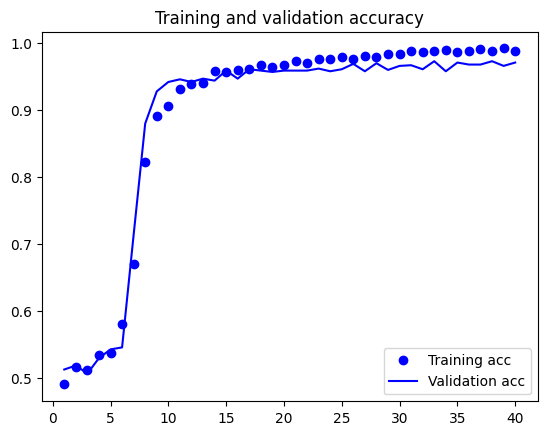

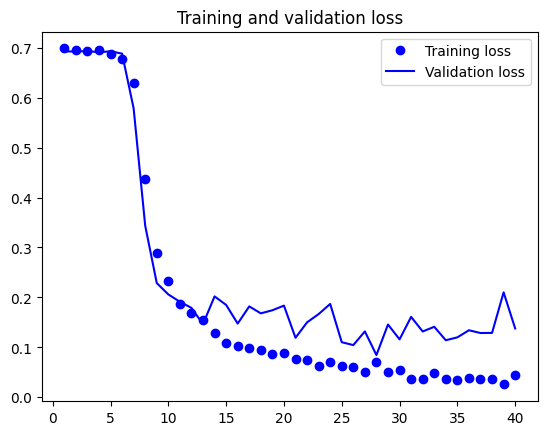

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("graphs/3-4/train_test_acc",dpi=100)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("graphs/3-4/train_test_loss",dpi=100)
plt.show()


In [31]:
model.save('models/3-4/3-4-C.h5')

/home/fred/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [36]:
file_paths = []
wrong_filenames = []
count = 0
file_idx = 0

# make sure we start in the beginning
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    shuffle=False
    )
    
file_paths = test_dataset.file_paths
for data_batch, labels_batch in test_dataset:

    predictions = model.predict(data_batch).flatten()
    predictions = predictions.round()
    predictions = predictions.astype(int)
    labels_batch = labels_batch.numpy()
    #pred_str = np.array2string(predictions, separator=', ')
    #label_str = np.array2string(labels_batch, separator=', ')
    for i in range(len(data_batch)):
        if labels_batch[i] != predictions[i]:
            wrong_filenames.append(file_paths[file_idx])
    file_idx += 1

# print(f"Predictions: {pred_str}")
# print(f"Labels: {label_str}")
print(file_idx)
print(count)
print(len(wrong_filenames))

Found 1000 files belonging to 2 classes.
1/1 [==============================] - 0s 18ms/step
1000
0
29


In [37]:
# write the wrong filenames to a file
with open('results/3-4/failed_filenames.txt', 'w') as f:
    for item in wrong_filenames:
        f.write("%s\n" % item)